In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/SUJAN/OneDrive/Desktop/niftynew.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-10-01,5021.500000,5976.000000,5000.950195,5900.649902,5900.649902,0
1,2007-11-01,5903.799805,6011.950195,5394.350098,5762.750000,5762.750000,0
2,2007-12-01,5765.450195,6185.399902,5676.700195,6138.600098,6138.600098,0
3,2008-01-01,6136.750000,6357.100098,4448.500000,5137.450195,5137.450195,0
4,2008-02-01,5140.600098,5545.200195,4803.600098,5223.500000,5223.500000,0


In [4]:
df = df[["Date","Close"]].copy()

In [5]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df1=df.set_index(['Date'])

Text(0.5, 1.0, 'NIFTY50 Closing Prices')

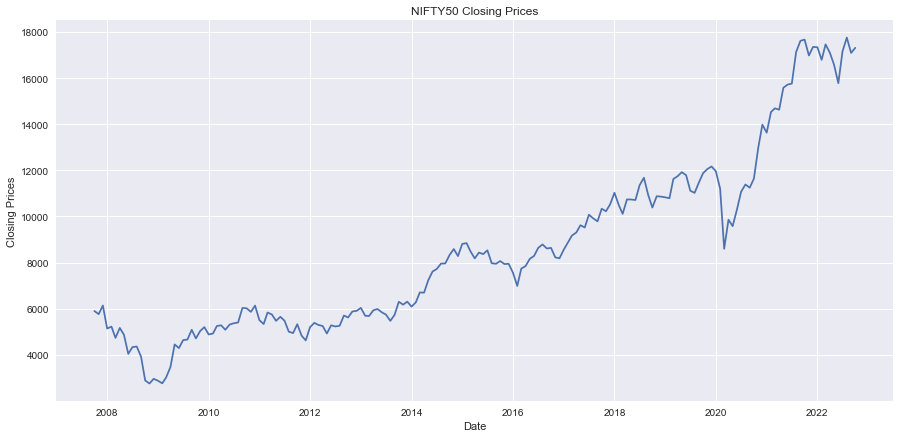

In [6]:
plt.figure(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.plot(df1.Close)
plt.title("NIFTY50 Closing Prices")

In [7]:
n=int(len(df) * 0.8)
train = df1[:n]
test = df1[n:]
print(len(train))
print(len(test))

144
37


Text(0.5, 1.0, 'Train and Test data of NIFTY50')

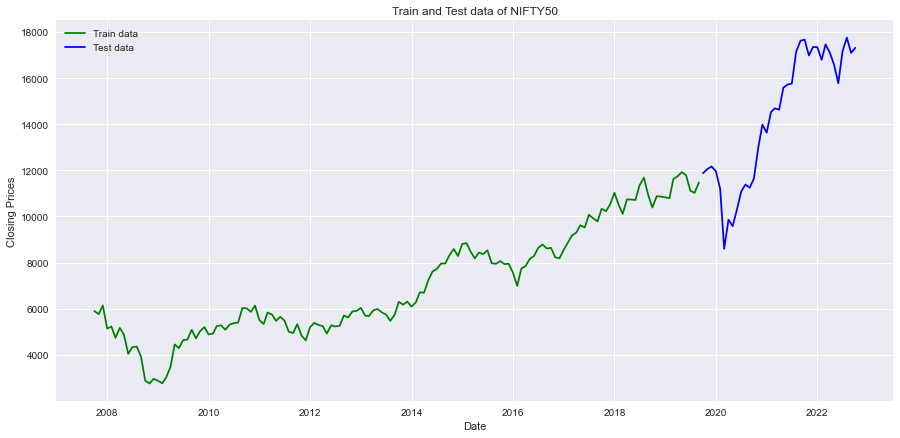

In [8]:
plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(train,'green',label='Train data')
plt.plot(test,'blue',label='Test data')
plt.legend()
plt.title("Train and Test data of NIFTY50")

In [9]:
df1.isnull().sum()/len(df1)

Close    0.0
dtype: float64

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(12).mean()
    rolling_std_dev = stock_close_price.rolling(12).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,10))
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='black', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='blue',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: 0.613947
p-value: 0.987954
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


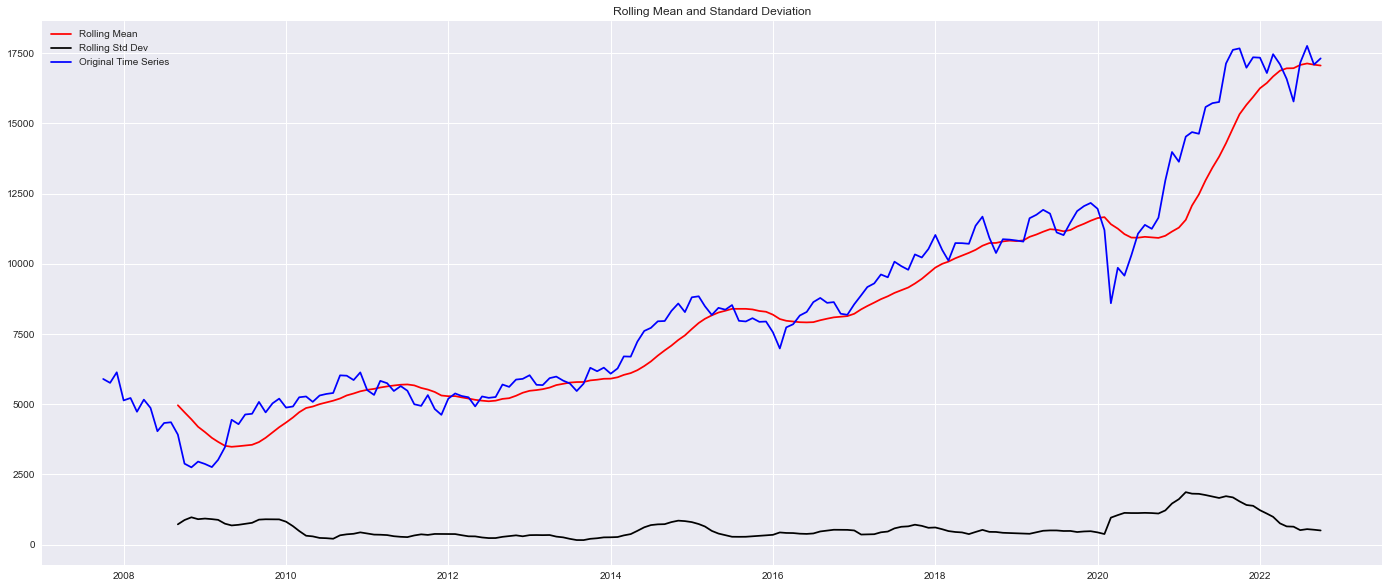

In [12]:
stationarity_test(df1)

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams

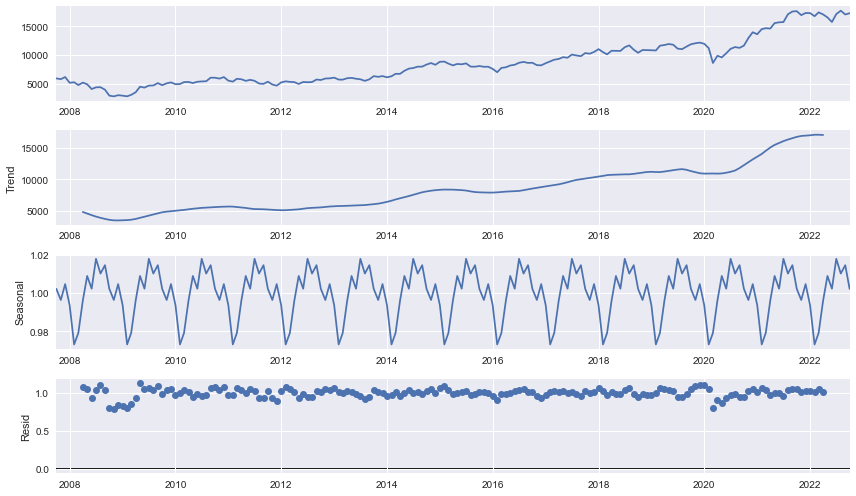

In [14]:
rcParams['figure.figsize']=12, 7
seasonal_decompose(df1,model='multiplicative',period=12).plot();

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

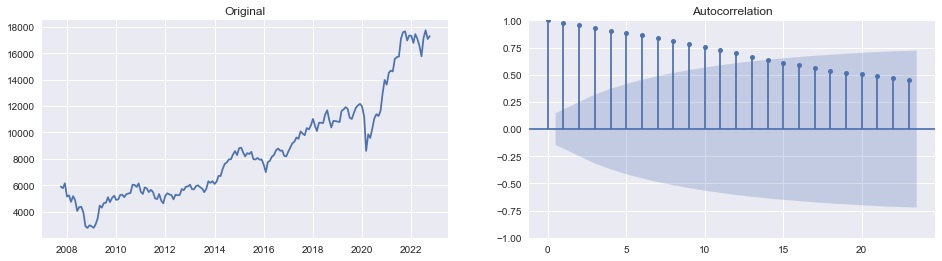

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df1.Close)
ax1.set_title("Original")
plot_acf(df1.Close, ax=ax2);

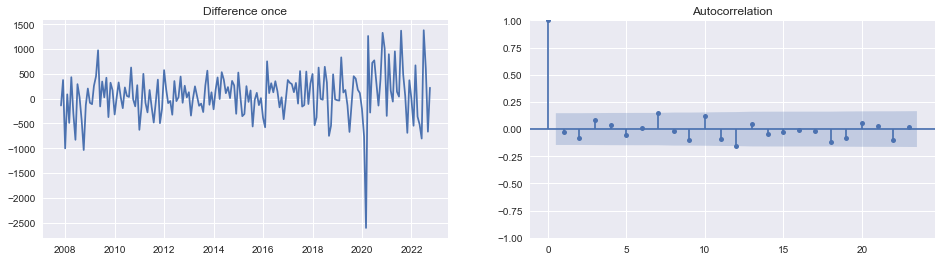

In [17]:
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -13.659266
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


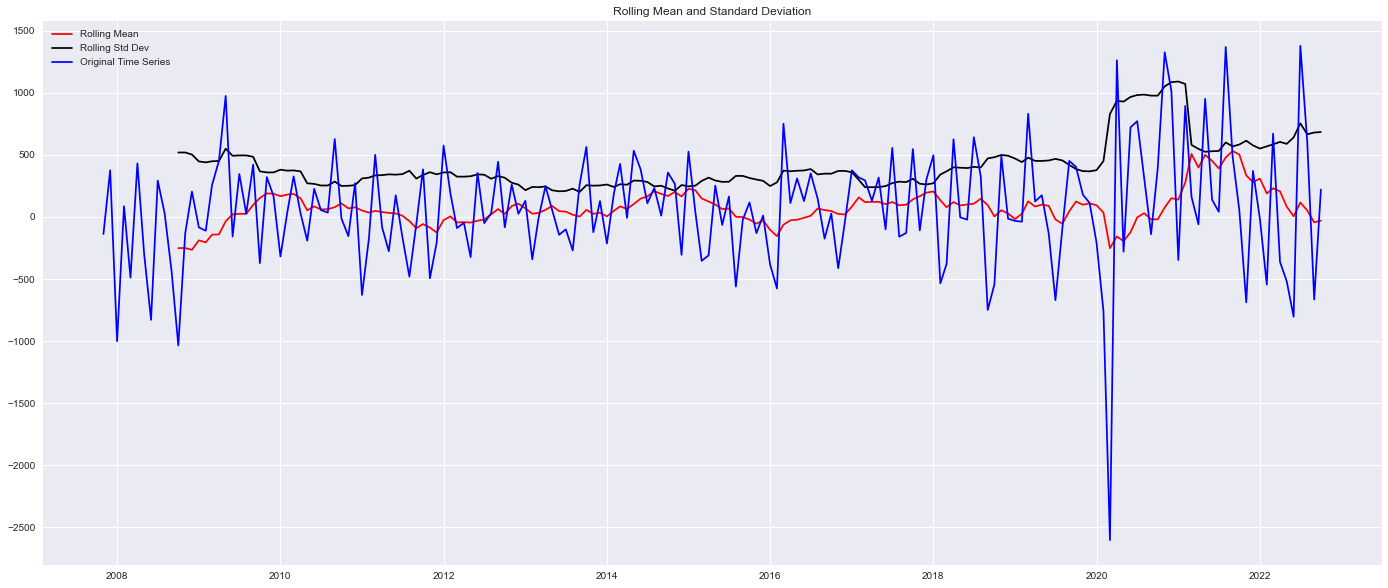

In [18]:
stationarity_test(diff)

In [43]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(diff, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags used','Number of observations used'])
for key,value in  dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.365927e+01
p-value                        1.532494e-25
#Lags used                     0.000000e+00
Number of observations used    1.790000e+02
Critical value (1%)           -3.467420e+00
Critical value (5%)           -2.877826e+00
Critical value (10%)          -2.575452e+00
dtype: float64


In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

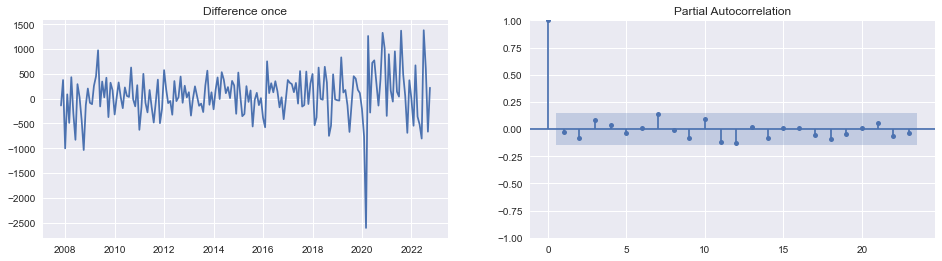

In [21]:
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2, method='ywm');

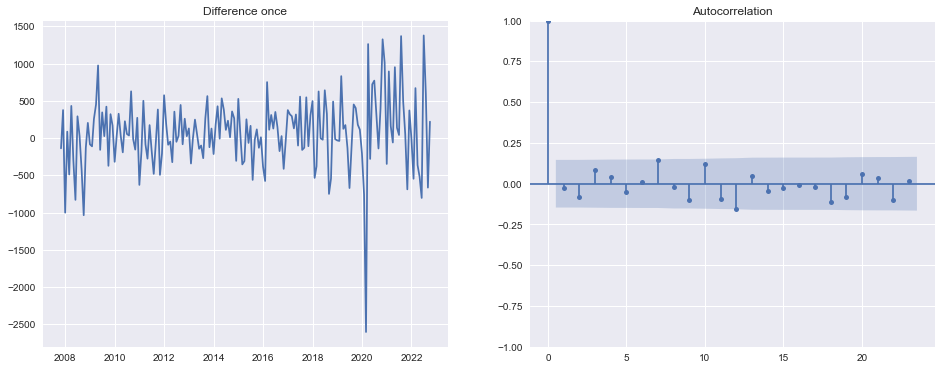

In [22]:
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [23]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2093.624, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2089.929, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2091.549, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2091.426, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2089.635, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.113 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1043.817
Date:                Wed, 02 Nov 2022   AIC                           2089.635
Time:                        15:18:09   BIC                           2092.597
Sample:                    10-01-2007   HQIC                          2090.839
                         - 09-01-2019                                       

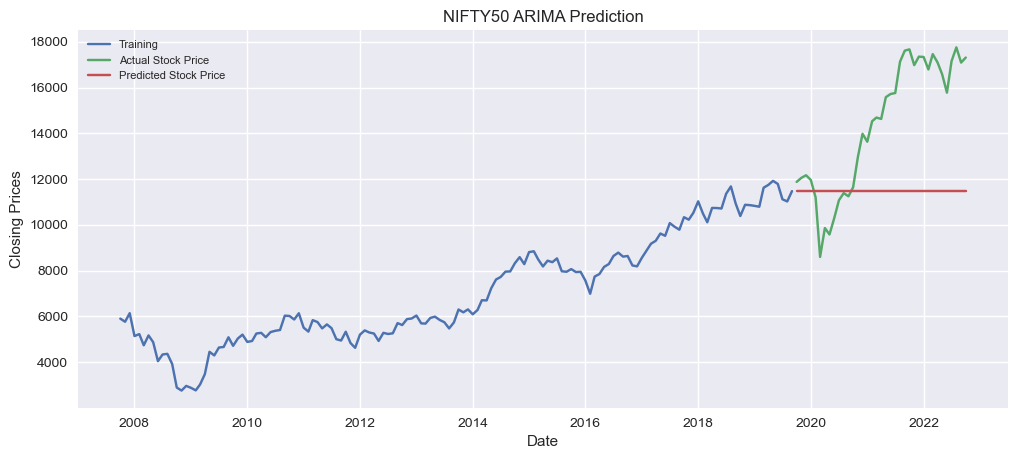

Auto-Arima RMSE :- 4023.598


In [24]:
arima_model = auto_arima(train,start_p=1, start_q=1,
                      max_p=5, max_q=5,   # maximum p and q
                      test='adf',         # use adftest to find optimal 'd'
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train) 
print(fitted_model.summary())

# Forecasting the values.
fc = fitted_model.predict(len(test), alpha=0.05) 
fc_series = pd.Series(fc, index=test.index)


#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual Stock Price')
plt.plot(fc,label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('NIFTY50 ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left', fontsize=8)
plt.show()

rms_auto_arima =np.sqrt(mean_squared_error(test.values, fc))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

In [25]:
train.index = pd.DatetimeIndex(train.index.values,freq=train.index.inferred_freq)
model = ARIMA(train, order=(0,1,0))
result = model.fit()

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  144
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1043.817
Date:                Wed, 02 Nov 2022   AIC                           2089.635
Time:                        15:18:10   BIC                           2092.597
Sample:                    10-01-2007   HQIC                          2090.839
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.28e+05   1.44e+04      8.863      0.000    9.97e+04    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.58   Prob(JB):                         0.21
Heteroskedasticity (H):               0.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
test_pred=result.forecast(37)

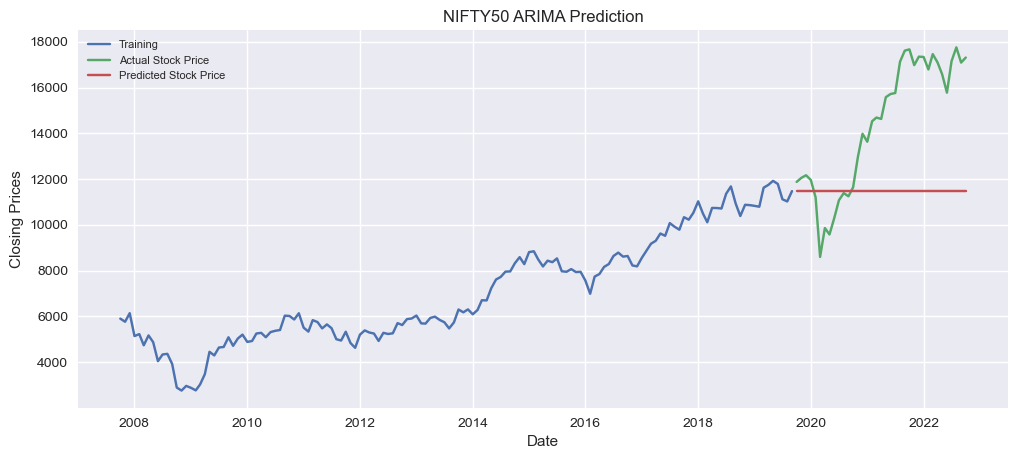

In [28]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual Stock Price')
plt.plot(test_pred,label='Predicted Stock Price')
plt.title('NIFTY50 ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:
df1.index = pd.DatetimeIndex(df1.index.values,freq=df1.index.inferred_freq)
pred_model = ARIMA(df1, order=(0,1,0))
pred_result = pred_model.fit()

In [30]:
pred_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  181
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1365.503
Date:                Wed, 02 Nov 2022   AIC                           2733.007
Time:                        15:18:10   BIC                           2736.200
Sample:                    10-01-2007   HQIC                          2734.301
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.271e+05   1.31e+04     17.325      0.000    2.01e+05    2.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               217.89
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
future_pred=pred_result.forecast(12)
print(future_pred)

2022-11-01    17314.65039
2022-12-01    17314.65039
2023-01-01    17314.65039
2023-02-01    17314.65039
2023-03-01    17314.65039
2023-04-01    17314.65039
2023-05-01    17314.65039
2023-06-01    17314.65039
2023-07-01    17314.65039
2023-08-01    17314.65039
2023-09-01    17314.65039
2023-10-01    17314.65039
Freq: MS, Name: predicted_mean, dtype: float64


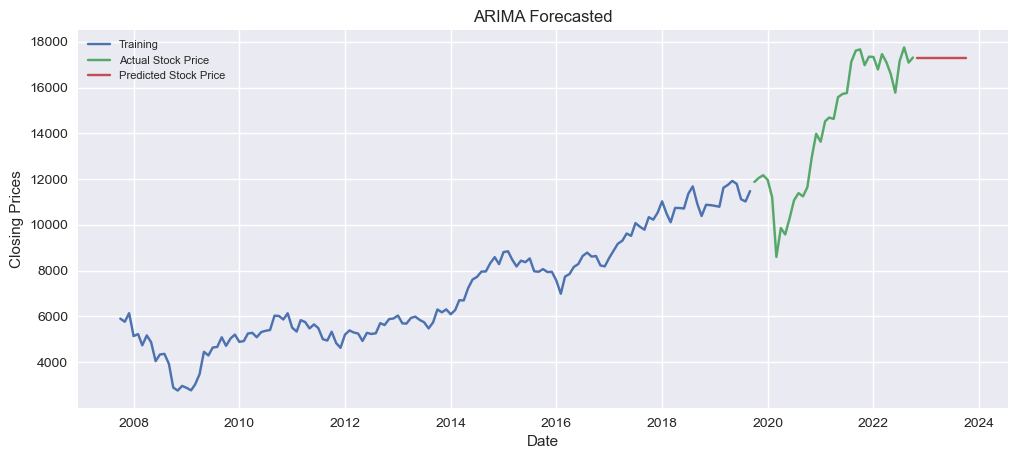

In [32]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual Stock Price')
plt.plot(future_pred,label='Predicted Stock Price')
plt.title('ARIMA Forecasted')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, test_pred)
print('MSE:- '+str(mse))
mae= mean_absolute_error(test, test_pred) 
print('MAE:- '+str(mae))
rmse= math.sqrt(mean_squared_error(test, test_pred)) 
print('RMSE:- '+str(rmse))
mape = mean_absolute_error(test, test_pred)*100
print('MAPE:- '+str(mape))

MSE:- 16189338.198883737
MAE:- 3355.3499503783787
RMSE:- 4023.5976686149593
MAPE:- 335534.9950378379


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
hwmodel=ExponentialSmoothing(train,trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [36]:
exp_test_pred = hwmodel.forecast(37)

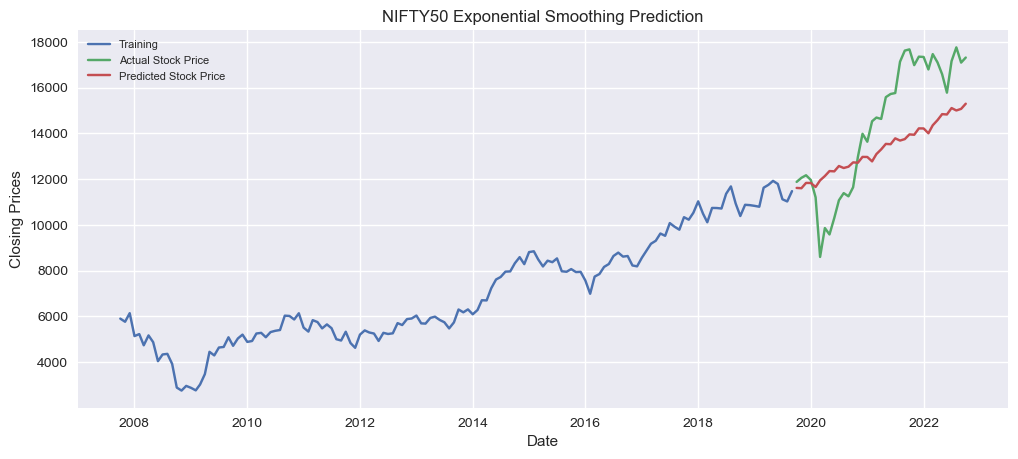

In [37]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual Stock Price')
plt.plot(exp_test_pred,label='Predicted Stock Price')
plt.title('NIFTY50 Exponential Smoothing Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
mse = mean_squared_error(test, exp_test_pred)
print('MSE:- '+str(mse))
mae= mean_absolute_error(test, exp_test_pred) 
print('MAE:- '+str(mae))
rmse= math.sqrt(mean_squared_error(test, exp_test_pred)) 
print('RMSE:- '+str(rmse))
mape = mean_absolute_error(test, exp_test_pred)*100
print('MAPE:- '+str(mape))

MSE:- 4710856.921264565
MAE:- 1897.187820739585
RMSE:- 2170.450856680373
MAPE:- 189718.78207395851


In [39]:
#!pip install sklearn
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [40]:
exp_hwmodel=ExponentialSmoothing(df1,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\SUJAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [41]:
exp_future_pred = exp_hwmodel.forecast(12)
print(exp_future_pred)

2022-11-01    16783.669530
2022-12-01    16995.897195
2023-01-01    16820.441712
2023-02-01    16700.727443
2023-03-01    17378.779272
2023-04-01    18357.205856
2023-05-01    19083.571347
2023-06-01    19041.040712
2023-07-01    19625.771315
2023-08-01    19678.708247
2023-09-01    20006.312847
2023-10-01    19676.599753
Freq: MS, dtype: float64


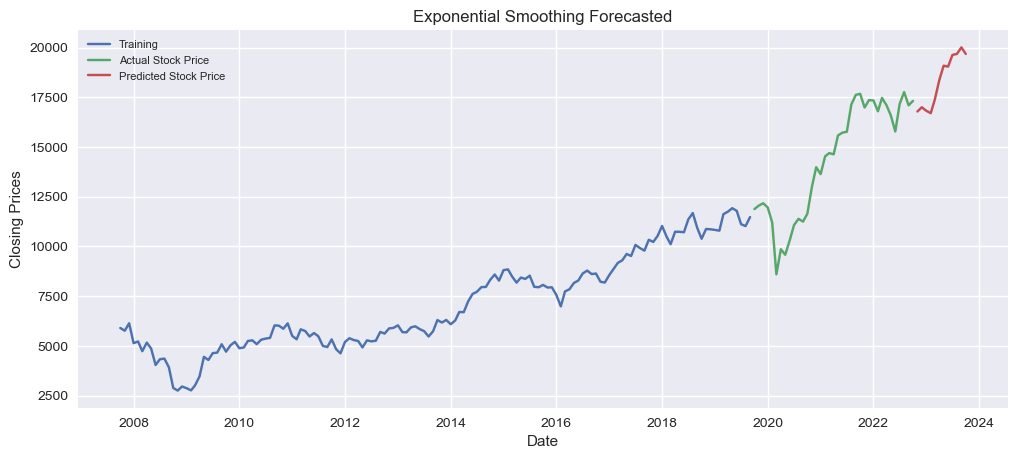

In [42]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual Stock Price')
plt.plot(exp_future_pred,label='Predicted Stock Price')
plt.title('Exponential Smoothing Forecasted')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left', fontsize=8)
plt.show()